In [1]:
import json
import requests
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np

In [86]:
bed_rent_1_df = pd.read_csv("Canada_1Bed_rent.csv")
bed_rent_1_df = bed_rent_1_df[~bed_rent_1_df.apply(lambda x: x.astype(str).str.contains('F')).any(axis=1)]
bed_rent_1_df = bed_rent_1_df[~bed_rent_1_df.apply(lambda x: x.astype(str).str.contains('\.\.')).any(axis=1)]
bed_rent_1_df.head()

,City,Province,1987,1988,1989,1990,1991,1992,1993,1994,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,St. John's,Newfoundland and Labrador,458,451,462,479,488,499,492,497,...,687,716,754,768,804,819,809,819,850,852
1,Charlottetown,Prince Edward Island,367,369,384,390,393,418,416,415,...,610,641,658,679,696,718,750,770,793,834
2,Cape Breton,Nova Scotia,308,317,343,343,377,405,395,402,...,568,593,614,651,637,643,652,677,710,713
3,Halifax,Nova Scotia,438,453,467,485,507,506,511,512,...,758,778,788,807,840,851,887,910,968,1023
6,Moncton,New Brunswick,354,369,368,389,407,419,423,427,...,603,634,640,658,650,692,693,720,750,790


In [87]:
bed_rent_2_df = pd.read_csv("Canada_2_Bed_rent.csv")
bed_rent_2_df = bed_rent_2_df[~bed_rent_2_df.apply(lambda x: x.astype(str).str.contains('F')).any(axis=1)]
bed_rent_2_df = bed_rent_2_df[~bed_rent_2_df.apply(lambda x: x.astype(str).str.contains('\.\.')).any(axis=1)]
bed_rent_2_df.head()

,City,Province,1987,1988,1989,1990,1991,1992,1993,1994,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,St. John's,Newfoundland and Labrador,538,516,535,544,570,575,562,566,...,779,803,871,897,935,986,963,991,980,997
1,Charlottetown,Prince Edward Island,448,457,472,492,514,519,528,529,...,764,808,808,840,832,876,901,922,936,983
2,Cape Breton,Nova Scotia,401,401,424,427,465,474,474,487,...,736,757,760,790,781,774,795,815,847,826
3,Halifax,Nova Scotia,527,537,551,576,604,602,611,616,...,932,960,984,1013,1056,1072,1115,1162,1209,1264
6,Moncton,New Brunswick,411,426,434,457,465,477,490,503,...,727,738,749,772,768,809,815,842,884,966


In [88]:
bed_rent_3_df = pd.read_csv("Canada_3_Bed_rent.csv")
bed_rent_3_df = bed_rent_3_df[~bed_rent_3_df.apply(lambda x: x.astype(str).str.contains('F')).any(axis=1)]
bed_rent_3_df = bed_rent_3_df[~bed_rent_3_df.apply(lambda x: x.astype(str).str.contains('\.\.')).any(axis=1)]
bed_rent_3_df.head()

,City,Province,1987,1988,1989,1990,1991,1992,1993,1994,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,St. John's,Newfoundland and Labrador,518,543,554,552,578,592,599,603,...,807,844,869,948,929,913,888,917,921,956
1,Charlottetown,Prince Edward Island,517,545,563,577,583,627,595,606,...,913,964,974,948,962,974,1012,1033,1071,1135
2,Cape Breton,Nova Scotia,519,554,581,558,581,641,611,581,...,998,980,1040,1056,1038,1109,1178,1093,1099,1223
3,Halifax,Nova Scotia,643,648,676,713,740,734,764,756,...,1152,1177,1217,1238,1276,1279,1298,1346,1387,1475
6,Moncton,New Brunswick,466,478,476,516,536,559,554,530,...,860,998,973,987,980,1010,984,1009,1000,1112


In [89]:
bachelor_rent_df = pd.read_csv("Canada_bachelor_rent.csv")
bachelor_rent_df = bachelor_rent_df[~bachelor_rent_df.apply(lambda x: x.astype(str).str.contains('F')).any(axis=1)]
bachelor_rent_df = bachelor_rent_df[~bachelor_rent_df.apply(lambda x: x.astype(str).str.contains('\.\.')).any(axis=1)]
bachelor_rent_df.head()

,City,Province,1987,1988,1989,1990,1991,1992,1993,1994,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,St. John's,Newfoundland and Labrador,364,380,356,392,396,380,444,413,...,607,627,666,650,705,712,718,739,734,750
3,Halifax,Nova Scotia,376,391,402,419,438,437,437,446,...,681,696,709,723,738,767,785,818,818,872
6,Moncton,New Brunswick,284,298,301,302,309,322,332,332,...,482,489,540,547,532,586,594,613,629,689
7,Drummondville,Quebec,224,236,246,247,252,262,258,261,...,379,377,378,376,383,383,380,409,443,462
8,Ottawa-Gatineau,Quebec part,354,366,382,405,434,454,460,476,...,711,737,746,760,779,792,813,839,899,955


In [90]:
combined_df = pd.concat([bed_rent_1_df,bed_rent_2_df,bed_rent_3_df,bachelor_rent_df], keys=['One Bed Room','Two Bed Room','Three Bed Room','Bachelor'])
combined_df.sample(15)

City       Province 1987 1988 1989 1990 1991  \
Two Bed Room   46          Edmonton        Alberta  459  463  477  515  534   
               37       Thunder Bay        Ontario  508  536  560  581  615   
Three Bed Room 9           Joliette         Quebec  353  370  385  388  416   
One Bed Room   45           Calgary        Alberta  384  395  427  458  473   
Three Bed Room 35  Sault Ste. Marie        Ontario  539  562  584  639  666   
One Bed Room   20        Belleville        Ontario  440  440  465  463  518   
Two Bed Room   8    Ottawa-Gatineau    Quebec part  538  559  579  607  636   
               25            Guelph        Ontario  459  480  521  564  581   
Three Bed Room 51          Red Deer        Alberta  516  522  521  550  575   
Two Bed Room   30            London        Ontario  478  500  520  549  577   
               39           Windsor        Ontario  523  528  553  618  628   
Bachelor       44         Saskatoon   Saskatchewan  268  270  265  269  274   
               38           Toronto        Ontario  377  405  428  453  482   
Two Bed Room   13   Saint-Hyacinthe         Quebec  349  363  383  398  415   
One Bed Room   18    Trois-Rivières         Quebec  335  338  346  335  344   

                  1992 1993 1994  ...  2011  2012  2013  2014  2015  2016  \
Two Bed Room   46  544  544  524  ...  1034  1072  1141  1228  1260  1230   
               37  636  656  676  ...   787   836   875   904   931   950   
Three Bed Room 9   422  437  431  ...   622   621   641   627   652   653   
One Bed Room   45  478  472  468  ...   903   961  1042  1137  1126  1053   
Three Bed Room 35  703  695  709  ...   777   802   854   894   869   910   
One Bed Room   20  524  548  543  ...   750   785   795   808   826   868   
Two Bed Room   8   659  679  688  ...   992  1007  1024  1030  1059  1078   
               25  621  630  645  ...   904   944   959   992  1030  1084   
Three Bed Room 51  577  593  591  ...   918   963  1061  1103  1138  1076   
Two Bed Room   30  602  624  637  ...   894   935   940   956   978  1018   
               39  646  658  666  ...   780   806   816   827   851   884   
Bachelor       44  276  280  278  ...   634   656   667   694   687   705   
               38  493  510  517  ...   822   841   878   900   941   959   
Two Bed Room   13  419  430  425  ...   590   606   614   621   635   655   
One Bed Room   18  362  353  358  ...   457   453   451   457   471   480   

                   2017  2018  2019  2020  
Two Bed Room   46  1215  1247  1258  1273  
               37   962  1050  1093  1109  
Three Bed Room 9    666   676   721   725  
One Bed Room   45  1027  1052  1082  1090  
Three Bed Room 35   936  1015   965  1038  
One Bed Room   20   900   942  1010  1079  
Two Bed Room   8   1106  1165  1266  1344  
               25  1130  1164  1293  1361  
Three Bed Room 51  1106  1113  1168  1179  
Two Bed Room   30  1059  1105  1124  1226  
               39   898   950   986  1083  
Bachelor       44   685   702   723   731  
               38  1016  1083  1150  1206  
Two Bed Room   13   685   691   696   816  
One Bed Room   18   493   492   527   525  

[15 rows x 36 columns]

In [53]:
combined_df[['1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000',
            '2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016',
            '2017','2018','2019','2020']] = combined_df[['1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000',
            '2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016',
            '2017','2018','2019','2020']].astype(float)

In [54]:
combined_df.dtypes

City         object
Province     object
1987        float64
1988        float64
1989        float64
1990        float64
1991        float64
1992        float64
1993        float64
1994        float64
1995        float64
1996        float64
1997        float64
1998        float64
1999        float64
2000        float64
2001        float64
2002        float64
2003        float64
2004        float64
2005        float64
2006        float64
2007        float64
2008        float64
2009        float64
2010        float64
2011        float64
2012        float64
2013        float64
2014        float64
2015        float64
2016        float64
2017        float64
2018        float64
2019        float64
2020        float64
dtype: object

In [77]:
means = combined_df.mean()
means

C:\Users\ricky\AppData\Local\Temp\ipykernel_23716\141182601.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means = combined_df.mean()


1987     411.926136
1988     427.573864
1989     449.551136
1990     473.380682
1991     496.142045
1992     510.085227
1993     519.250000
1994     522.380682
1995     532.261364
1996     536.761364
1997     540.079545
1998     550.653409
1999     558.755682
2000     574.937500
2001     591.982955
2002     609.306818
2003     622.812500
2004     634.681818
2005     648.568182
2006     669.193182
2007     692.795455
2008     722.301136
2009     737.079545
2010     752.642045
2011     773.494318
2012     793.062500
2013     818.329545
2014     842.136364
2015     863.164773
2016     891.823864
2017     916.090909
2018     953.090909
2019     992.590909
2020    1038.119318
dtype: float64

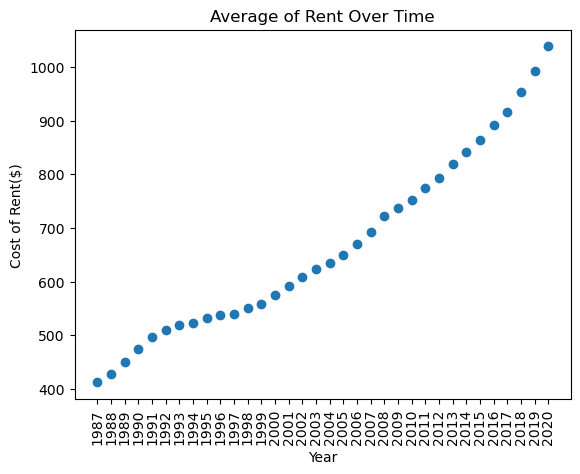

In [92]:
plt.scatter(means.index,means.values)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Cost of Rent($)')
plt.title('Average of Rent Over Time')
plt.show()